                                   University of Waterloo
                  ECE 657A: Data and Knowledge Modeling and Analysis Winter 2020
                                       Assignment 2

### importing all the required libraries

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.pyplot import figure 
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]
#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
#concatenating the red and white wine dataset into a single data frame
wine = pd.concat([wine_w,wine_r])
wine_copy=pd.concat([wine_w,wine_r])
#the wine dataframe has all the features,quality and color
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
#the shape of wine dataframe
#print(wine.shape)
wine[D]
wine[D].describe()
#considering the top values of wine dataframe with just the features
wine[D].head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [4]:
# classify color of wine with all features and create a duplicate inorder to make modifications without affecting the base dataframe
X = wine[D].values#contains feature values
y = np.ravel(wine[[C]])#contains color values 
#creating dataframe for wine with colors (unnormalaized)
wine_classifycolor=wine[DC].copy()
print(wine_classifycolor)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

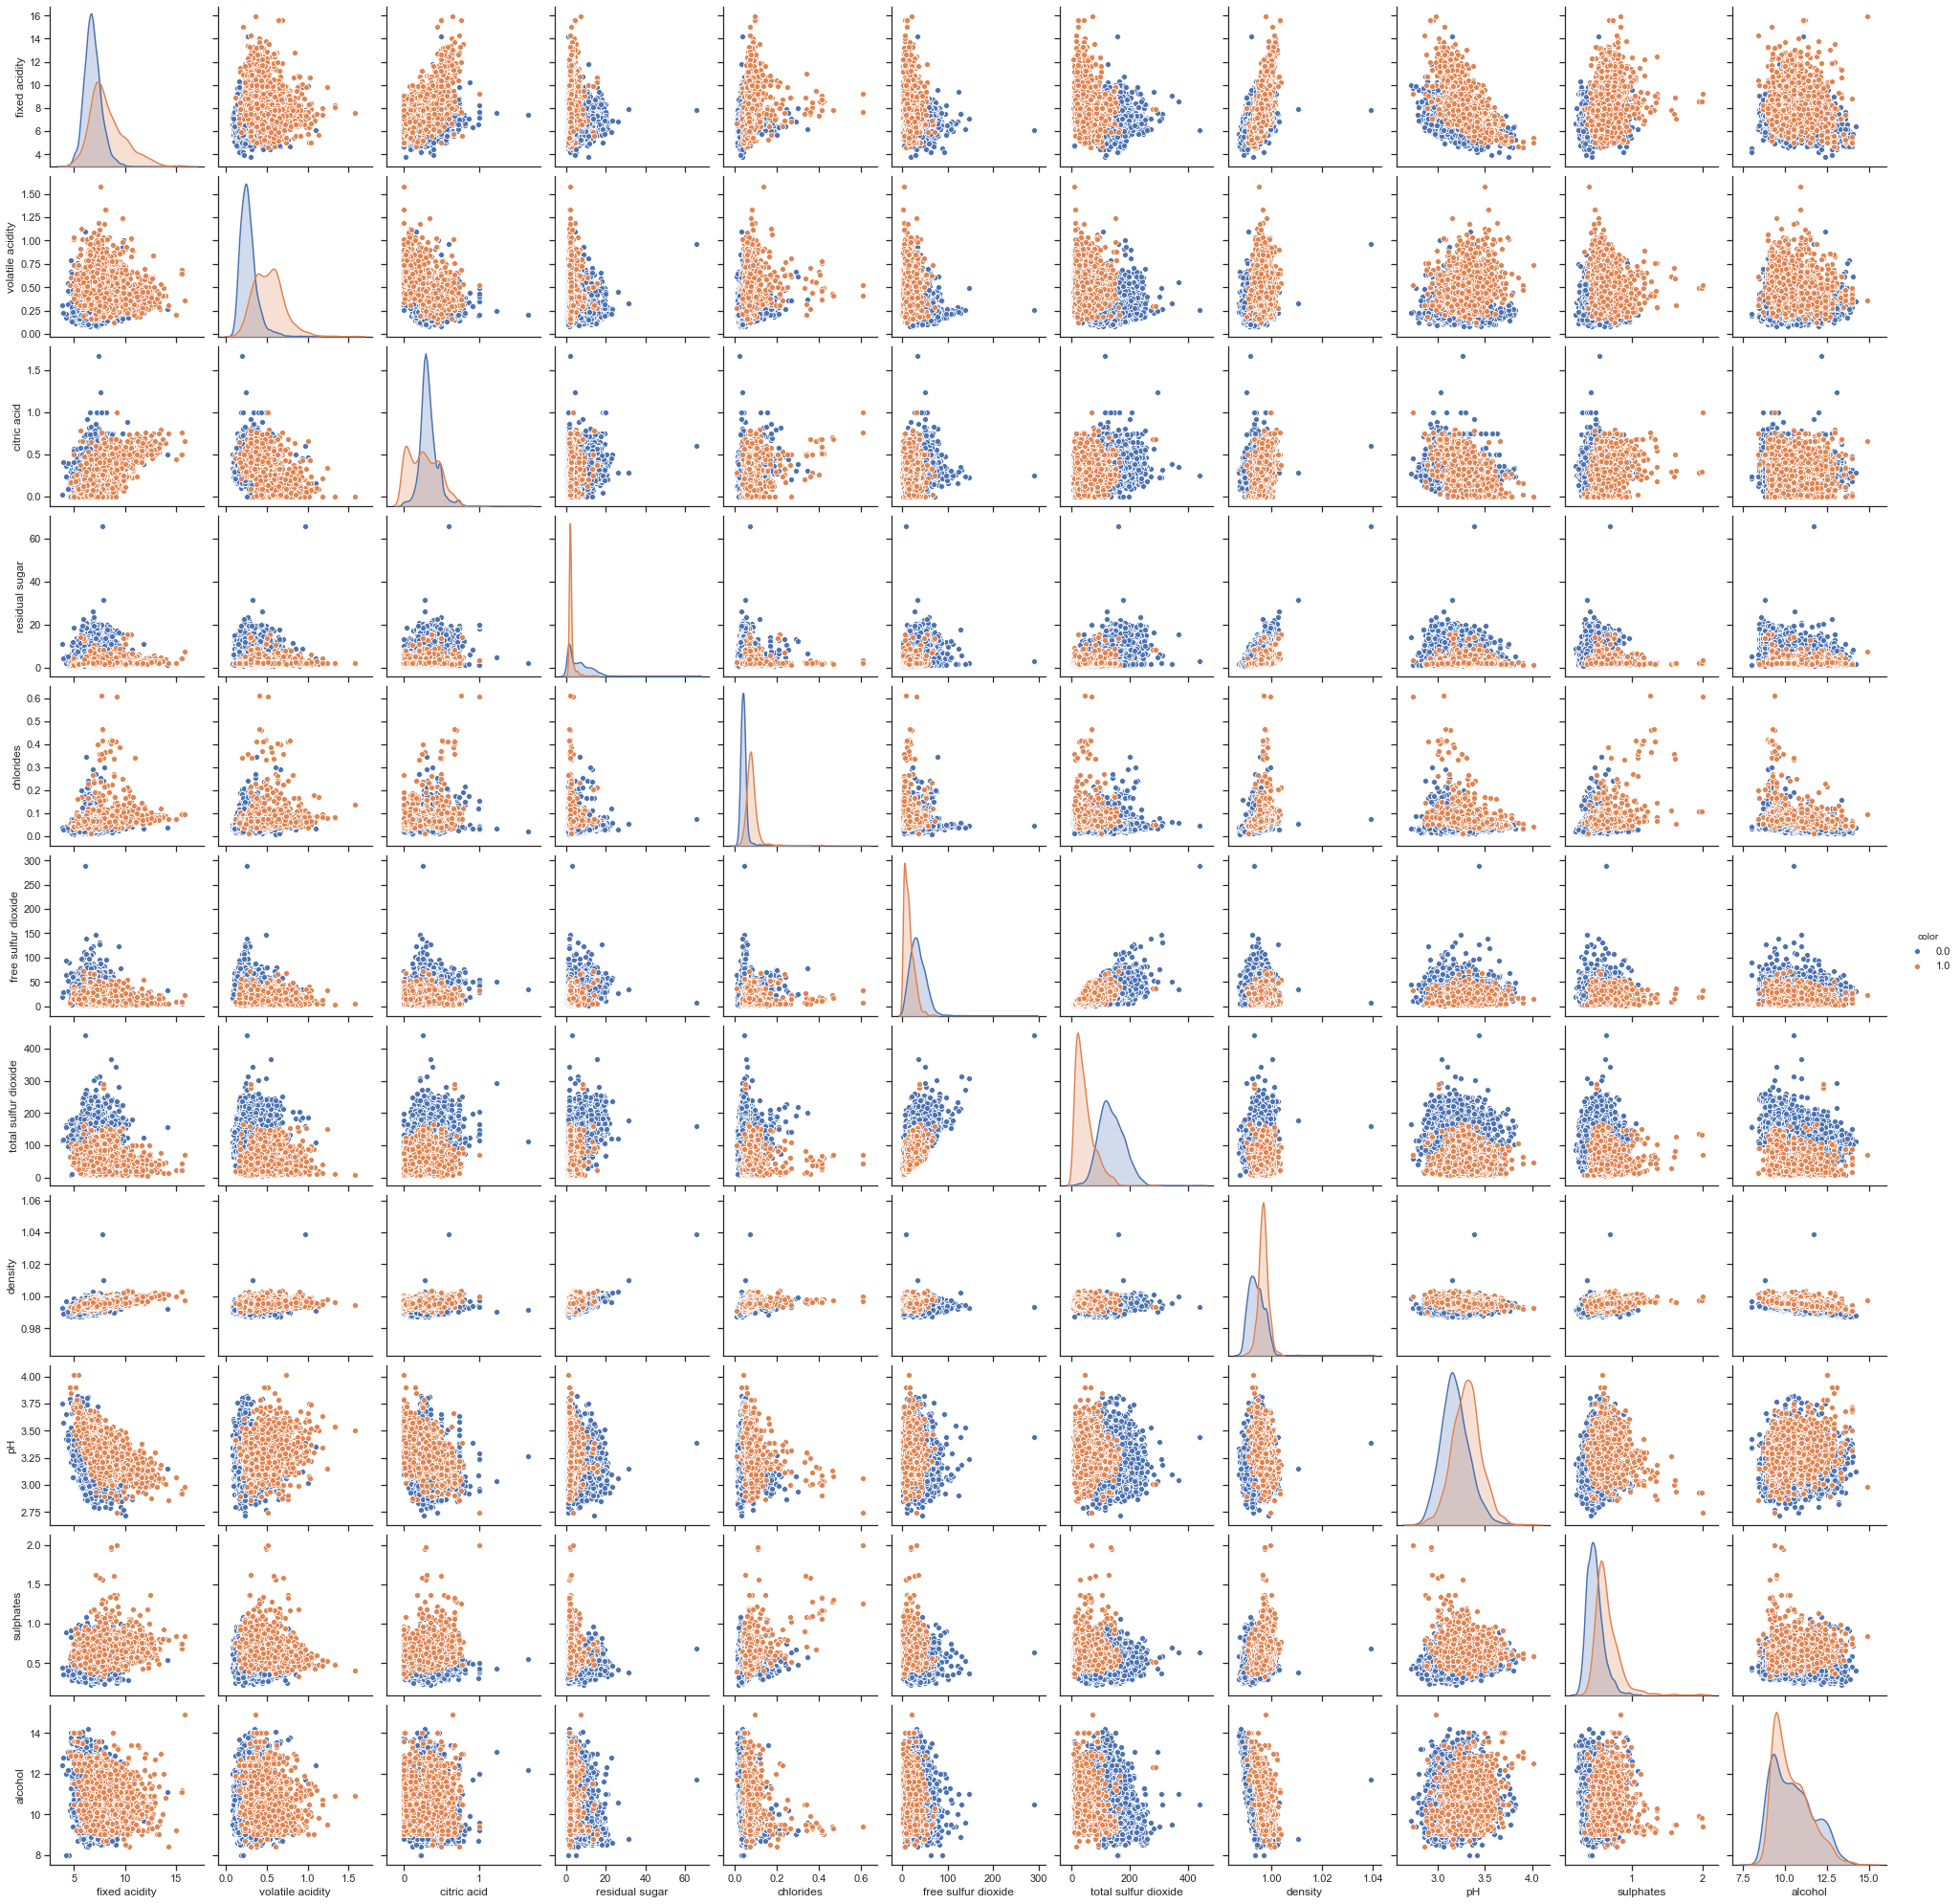

In [5]:
# pairplot for unnormalized
g=sns.pairplot(wine[DC],hue='color')
plt.show()

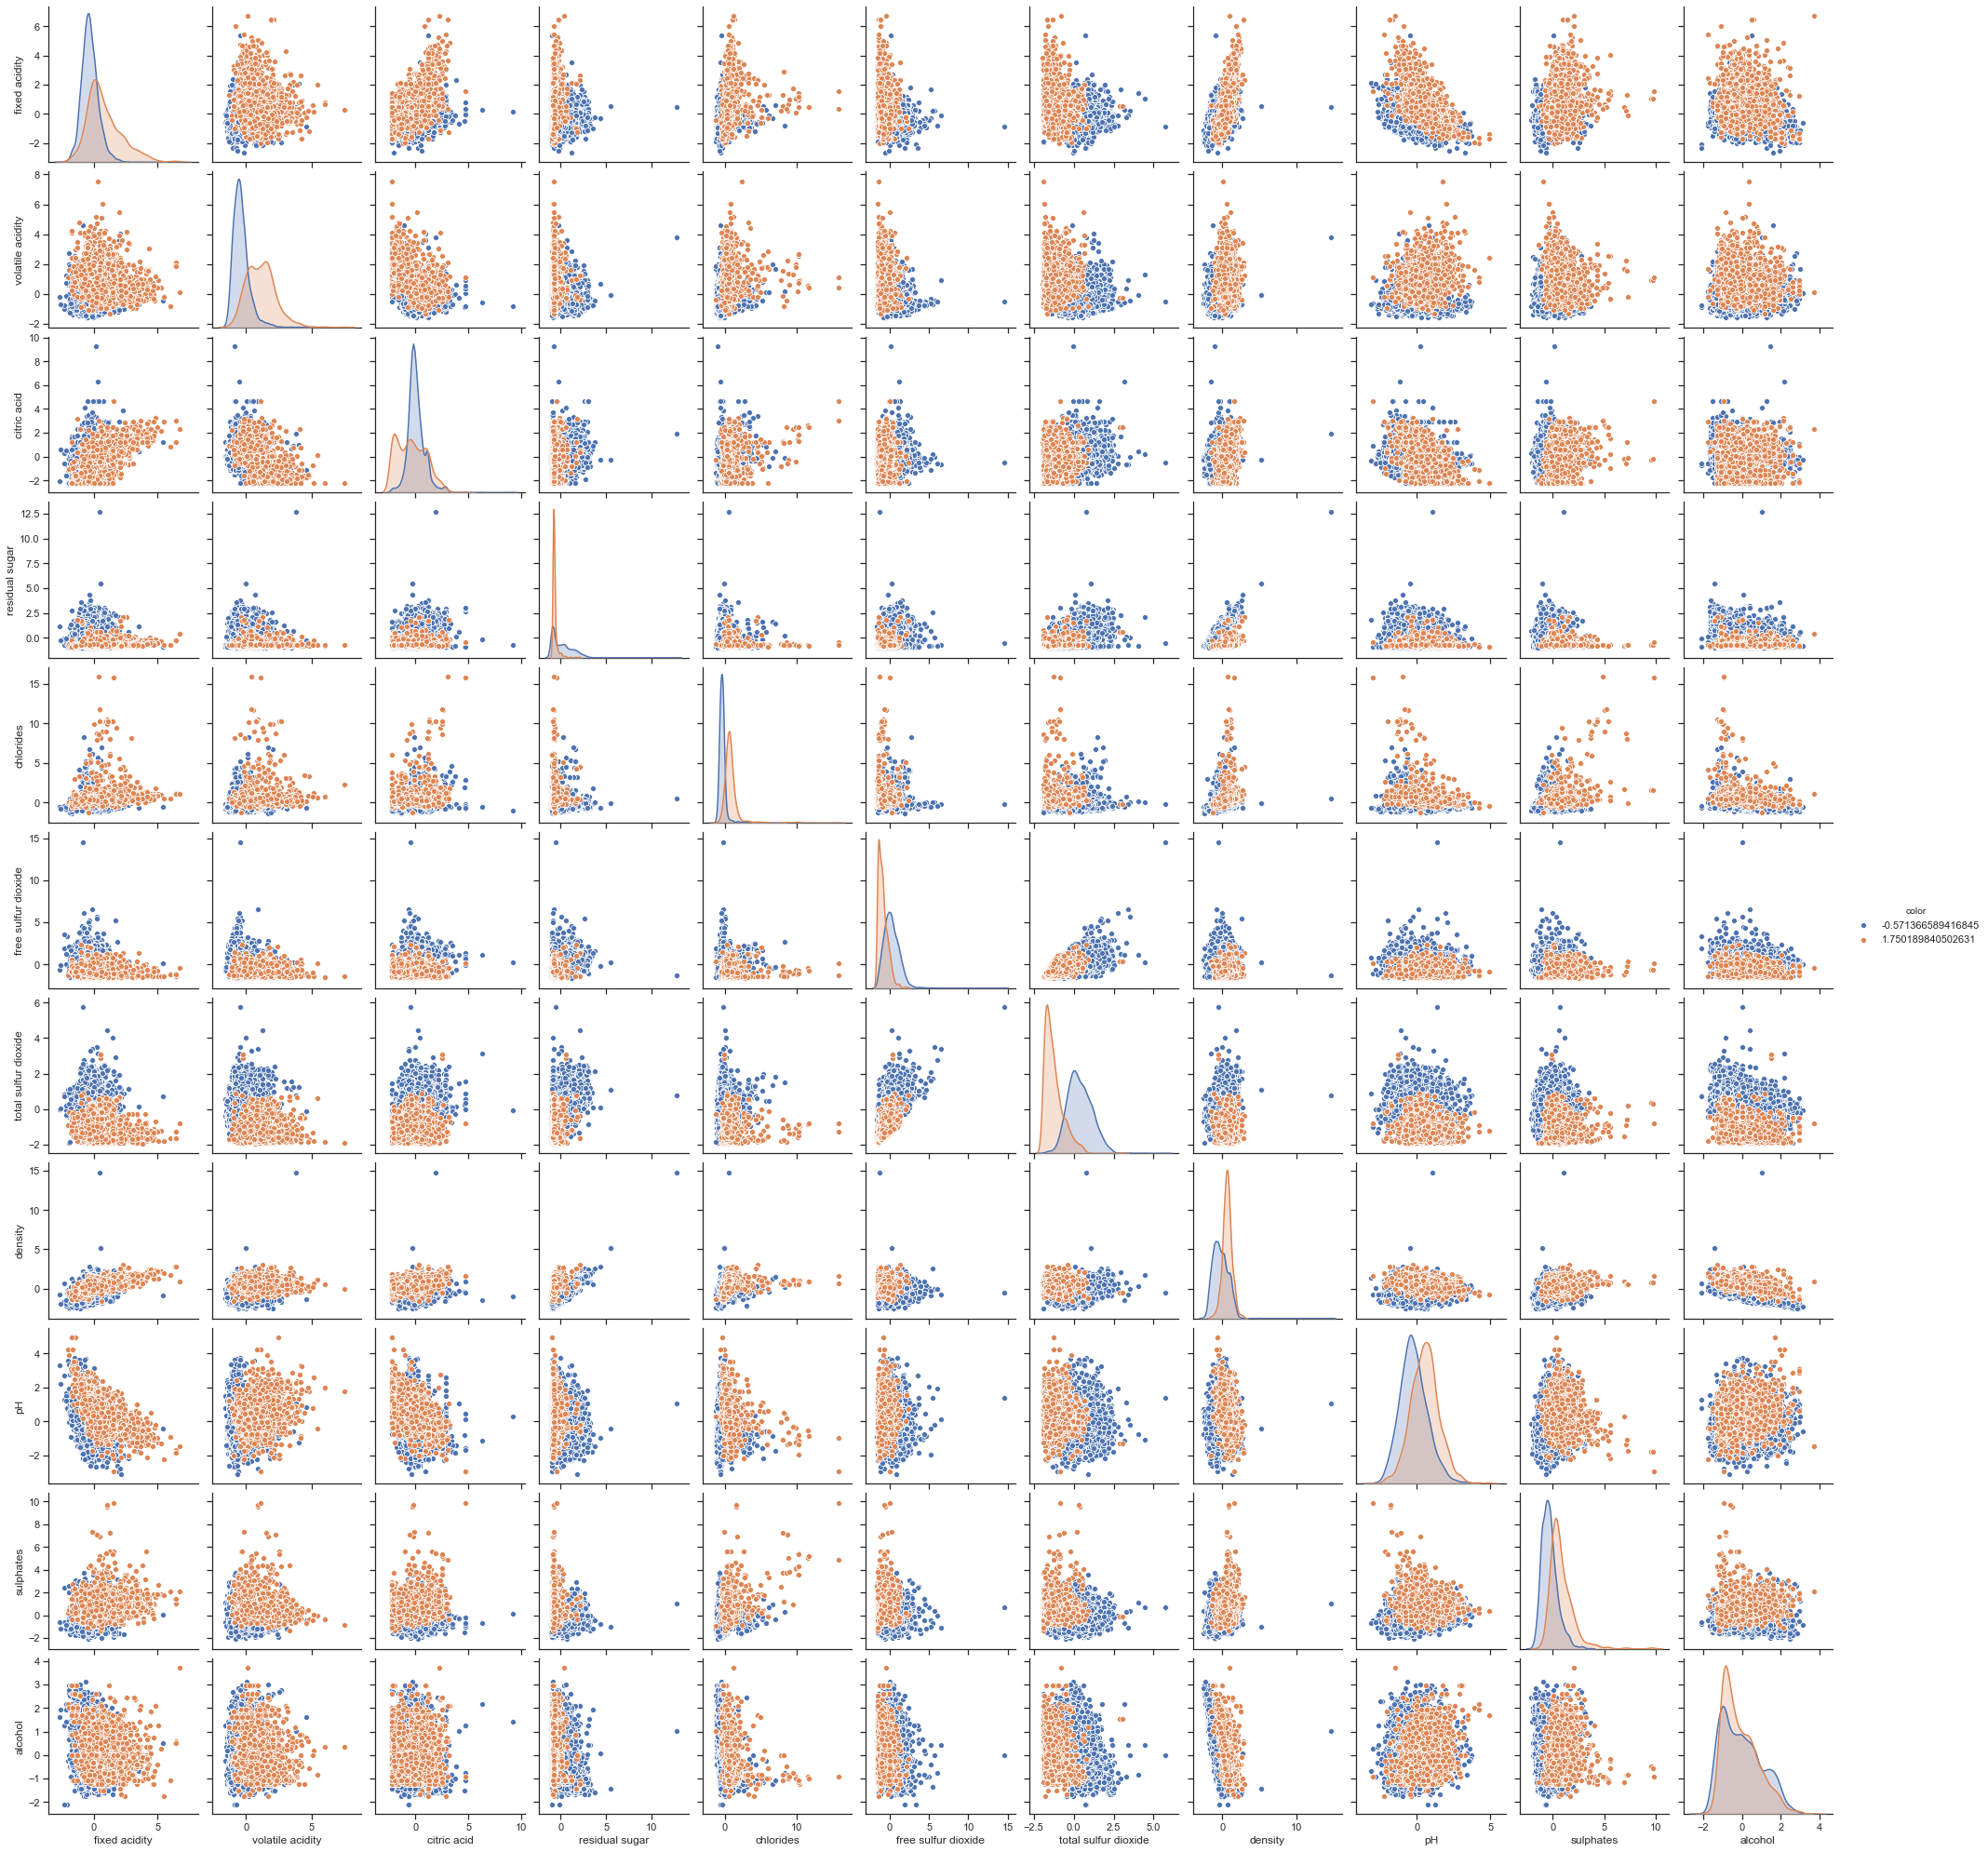

In [6]:
#normalize winecolor data z score normalization
Norm_wine=wine_classifycolor.copy()
scaler = StandardScaler().fit(wine_classifycolor)
Norm_wine[DC]=scaler.transform(wine_classifycolor)
# print(Norm_wine[DC]) 
#pairplot for normalized data
g=sns.pairplot(Norm_wine[DC],hue='color')
plt.show()

### Analysis of pair plot of the given unnormalized data and the normalized data with color as label
From the visualization,we are able to obtain the histograms and pair plots for the available features.
#### Information identified from the histogram
1.The Total Sulphur Dioxide seems to be the best classifier of the wine dataset as the overlap between the red and white wine is low followed by Free sulphur dioxde.

2.From "residual sugar" feature, we are able to see that it's content in the red wine samples remains consistent when compared to the white wine samples.

3.From the comparision between the red and white wine samples we are able to see that for the "citric acid feature" the white wine concentration is narrower when compared to the red wine which is evenly spread over its range.

4.From chlorides the overlap is less but the data points are very close to each other.So,we wont be able to better classify them using KNN classifier.

5.The feature "alcohol" is the worst classifier to consider in the above dataset and in the remaining histogram we cant classify the data points as the overlap is vey high.

#### Information identified from the pair plots of feature
1.We observe that the total Sulphur Dioxide vs other features plots classifies the data better when compared to other pairplots as there is a good boundary to classify between the red and white wine data points.

2.From all the other pair plots we can see that we can't provide a boundary line for classification of red and white wine data points as they overlap in most of the regions or they are scattered all over.

There is not much of a difference in the two  visulizations obtained except for the fact that the data is scaled in normalized data.


# Effect of Normalization, Feature, Extraction and Distance Metrics
## Tasks
### Train/Test Data Split:(80-20)

In [7]:
ran = 42#setting the random seed value to 42 to maintain split state
#Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran)

### Normalization:

In [8]:
#comparision between normalized and unnormalized data
#normalizing the train and test data set
X_train_norm=X_train.copy()
X_test_norm=X_test.copy()
Xtrain_scaler=StandardScaler().fit(X_train_norm)
#transform the Xtrain and Xtest
X_train_norm=Xtrain_scaler.transform(X_train_norm)
X_test_norm=Xtrain_scaler.transform(X_test_norm)
n_neighborslist = list(range(1,50))
col_names=['uniform','euclidean_distance','manhattan_distance','uniform_norm','euclidean_distance_norm','manhattan_distance_norm']#for matrix
metric_loop = [['uniform', 2],['distance',2], ['distance',1],['uniform', 2],['distance',2], ['distance',1]]#for metric

### COMMENT:
Here we have split the normalized data with train and test data having 80-20 percentage of split from original data.Then we have fit transformed the trining data set and have transformed the testing dataset that is to be tested.The data is normalized using z-score normalization.

In [9]:
# creating acc array for unnormalized and normalized data
acc_array=np.zeros((len(n_neighborslist),len(col_names)))
acc=pd.DataFrame(acc_array,columns=col_names)

### Classification:

In [10]:
#knn classifier function for normalized and unnormalized data
for i in range(len(metric_loop)):
    for k in n_neighborslist:
        if(i<3):
            neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=metric_loop[i][0],p=metric_loop[i][1])
            neigh.fit(X_train, y_train)
            y_pred = neigh.predict(X_test)
            accscore = accuracy_score(y_test, y_pred)
            acc.at[k,col_names[i]] = accscore
        else:
            neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=metric_loop[i][0],p=metric_loop[i][1])
            neigh.fit(X_train_norm, y_train)
            y_pred = neigh.predict(X_test_norm)
            accscore = accuracy_score(y_test, y_pred)
            acc.at[k,col_names[i]] = accscore

In [11]:
#accuracy values for normalized and unnormalized data
acc.describe()
acc.head()

uniform  euclidean_distance  manhattan_distance  uniform_norm  \
0  0.000000            0.000000            0.000000      0.000000   
1  0.950000            0.950000            0.961538      0.993846   
2  0.939231            0.950000            0.961538      0.993846   
3  0.935385            0.949231            0.960000      0.995385   
4  0.935385            0.951538            0.960769      0.994615   

   euclidean_distance_norm  manhattan_distance_norm  
0                 0.000000                 0.000000  
1                 0.993846                 0.995385  
2                 0.993846                 0.995385  
3                 0.996154                 0.995385  
4                 0.995385                 0.996154

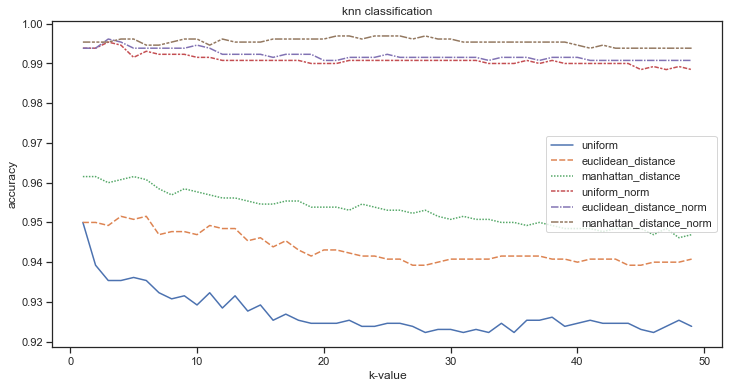

In [12]:
#plotting data for normalized and unnormalized data
plt.figure(figsize=(12,6))
plt.title("knn classification")
plt.xlabel("k-value")
plt.ylabel("accuracy")
g=sns.lineplot(data=acc[1:])
plt.show()

### COMMENT
From the obtained accuracy plot we can conclude that the manhattan distance with uniform weight distribution gives the best accuracy on both the normalized and unnormalized data.

#### FEATURE EXTRACTION

#### PCA

In [13]:
# creating acc array for pca fit unnormalized and normalized data
acc_array_pca=np.zeros((len(n_neighborslist),len(col_names)))
acc_pca=pd.DataFrame(acc_array_pca,columns=col_names)

In [14]:
%%time
#fitting data into pca for five components
pca = PCA(n_components=5)
pca_cols=['pca-1','pca-2','pca-3','pca-4','pca-5']
principal_component_train=pca.fit_transform(X_train_norm)
principal_component_test=pca.transform(X_test_norm)
pca_df=pd.DataFrame(principal_component_train,columns=pca_cols)
principal_component_train_unnorm=pca.fit_transform(X_train)
principal_component_test_unnorm=pca.transform(X_test)

CPU times: user 53.6 ms, sys: 30.6 ms, total: 84.1 ms
Wall time: 22 ms


In [15]:
#applying knn classifier for pca fit data
for i in range(len(metric_loop)):
    for k in n_neighborslist:
        if(i<3):
            neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=metric_loop[i][0],p=metric_loop[i][1])
            neigh.fit(principal_component_train_unnorm, y_train)
            y_pred = neigh.predict(principal_component_test_unnorm)
            accscore = accuracy_score(y_test, y_pred)
            acc_pca.at[k,col_names[i]] = accscore
        else:
            neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=metric_loop[i][0],p=metric_loop[i][1])
            neigh.fit(principal_component_train, y_train)
            y_pred = neigh.predict(principal_component_test)
            accscore = accuracy_score(y_test, y_pred)
            acc_pca.at[k,col_names[i]] = accscore
#print(acc_pca)
acc_pca.describe()
acc_pca.head()

uniform  euclidean_distance  manhattan_distance  uniform_norm  \
0  0.000000            0.000000            0.000000      0.000000   
1  0.945385            0.945385            0.955385      0.991538   
2  0.936154            0.945385            0.955385      0.986923   
3  0.934615            0.948462            0.956923      0.983077   
4  0.935385            0.951538            0.955385      0.984615   

   euclidean_distance_norm  manhattan_distance_norm  
0                 0.000000                 0.000000  
1                 0.991538                 0.990000  
2                 0.992308                 0.990000  
3                 0.987692                 0.988462  
4                 0.990769                 0.988462

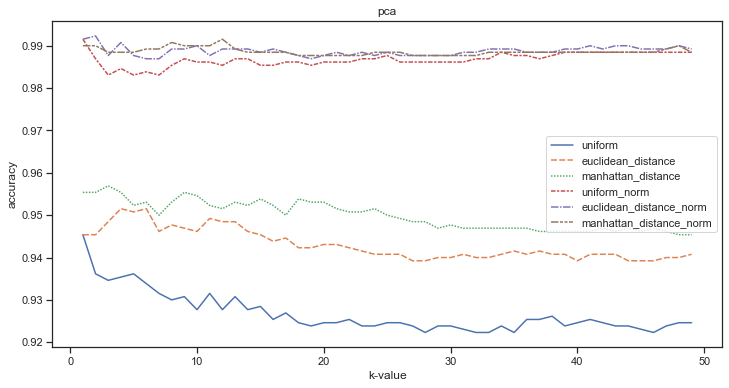

In [16]:
plt.figure(figsize=(12,6))
plt.title("pca")
plt.xlabel("k-value")
plt.ylabel("accuracy")
acc_pca_chart=sns.lineplot(data=acc_pca[1:])
plt.show()

### LDA

In [17]:
# creating acc array for lda fit unnormalized and normalized data
acc_array_lda=np.zeros((len(n_neighborslist),len(col_names)))
acc_lda=pd.DataFrame(acc_array_lda,columns=col_names)

In [18]:
%%time
#fitting data into lda
clf = LinearDiscriminantAnalysis()
lda_train=clf.fit_transform(X_train_norm,y_train)
lda_test = clf.transform(X_test_norm)
lda_train_unnorm=clf.fit_transform(X_train,y_train)
lda_test_unnorm=clf.transform(X_test)

CPU times: user 73 ms, sys: 15.2 ms, total: 88.2 ms
Wall time: 28.3 ms


In [19]:
#applying knn classifier for lda fit data
for i in range(len(metric_loop)):
    for k in n_neighborslist:
        if(i<3):
            neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=metric_loop[i][0],p=metric_loop[i][1])
            neigh.fit(lda_train_unnorm,y_train)
            y_pred = neigh.predict(lda_test_unnorm)
            accscore = accuracy_score(y_test, y_pred)
            acc_lda.at[k,col_names[i]] = accscore
        else:
            neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=metric_loop[i][0],p=metric_loop[i][1])
            neigh.fit(lda_train, y_train)
            y_pred = neigh.predict(lda_test)
            accscore = accuracy_score(y_test, y_pred)
            acc_lda.at[k,col_names[i]] = accscore
#print(acc_lda)
acc_lda.describe()
acc_lda.head()

uniform  euclidean_distance  manhattan_distance  uniform_norm  \
0  0.000000            0.000000            0.000000      0.000000   
1  0.992308            0.992308            0.992308      0.992308   
2  0.993077            0.992308            0.992308      0.993077   
3  0.992308            0.992308            0.992308      0.992308   
4  0.992308            0.992308            0.992308      0.992308   

   euclidean_distance_norm  manhattan_distance_norm  
0                 0.000000                 0.000000  
1                 0.992308                 0.992308  
2                 0.992308                 0.992308  
3                 0.992308                 0.992308  
4                 0.992308                 0.992308

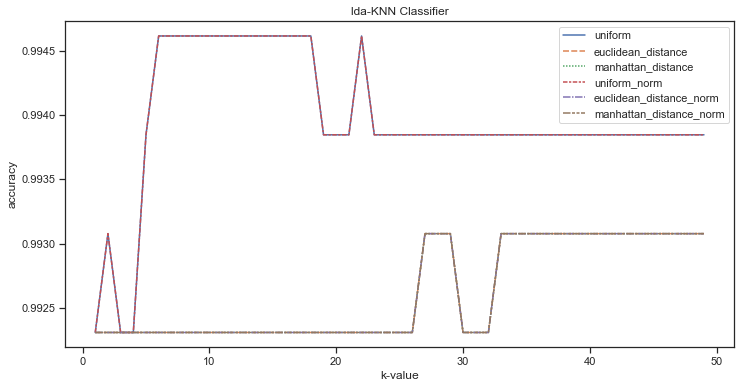

In [20]:
plt.figure(figsize=(12,6))
plt.title("lda-KNN Classifier")
plt.xlabel("k-value")
plt.ylabel("accuracy")
acc_lda_chart=sns.lineplot(data=acc_lda[1:])
plt.show()

### Feature Extraction Analysis

#### Time: 
Interms of time,PCA takes lesser time when compared to LDA
2. From the accuracy plot of PCA we observe that Manhattan+z-norm has highest accuracy.
3. From the accuracy plot of LDA we observe that there is no difference in accuracy with or without normalization.
4. Comparing the accuracies with PCA and LDA feature extractions , we observe that the accuracies obtained with LDA is greater than that of PCA.

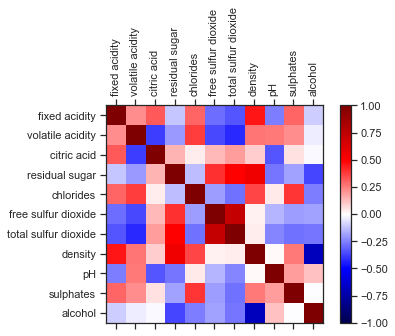

In [21]:
correlation=wine[D].corr()
correlation
fig=plt.figure()
ax=fig.add_subplot(111)
heatmap=ax.matshow(correlation,cmap='seismic',vmin=-1,vmax=1)
fig.colorbar(heatmap)
ticks=np.arange(0,len(wine[D].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(wine[D].columns)
ax.set_yticklabels(wine[D].columns)
plt.show()



### k Plots: 
Analysis is done previously using pairplots
### Features:
The number of features in the given dataset is 11.The correlation matrix for these features are constructed using corr().From the heatmap that is obtained we are able to conclude the following information:

- "density vs alcohol" features are highly inversely correlated.
- The following feature coorelations :"Chlorides vs citric acid", "total sulphur dioxide vs density", "total sulphur dioxide vs density", "ph vs density" and "sulphates vs alcohol" show very less or no correlation.
- "Total Sulphiur Dioxide vs free Sulphur Dioxide" features are highly correlated.

correlation>0 ==> shows positive correlation
correlation=0 ==> shows no correlation
correlation<0 ==> shows negative correlation

### PCA vs. LDA:

PCA and LDA tries to improve the accuracy through dimensionality reduction but in our given data dataset,PCA and LDA reduces the accuracy and hence the performance is not improved.LDA has no effect of change even after normalization of data unlike PCA which works better on normalized data.

###  plot projecting the data on the first two components

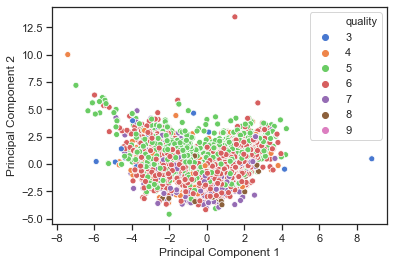

In [25]:
#pca analysis n_Components=2 color label
pal={0:"#9b59b6",1:"#e5e189"}
s=StandardScaler()
norm_wine=wine[D].copy()
norm_wine=s.fit_transform(wine[D])
pca = PCA(n_components=2)
pca.fit(norm_wine)
x_pca =pca.transform(norm_wine)
norm_wine.shape
x_pca.shape
g = sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=wine['quality'], palette = "muted")
plt.xlabel("PC1")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

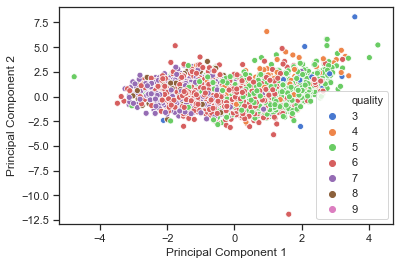

In [23]:
#lda analysis
lda = LinearDiscriminantAnalysis()
s=StandardScaler()
lda_data=s.fit_transform(wine[D])
lda.fit(lda_data,wine[L])
x_lda =lda.transform(lda_data)
g = sns.scatterplot(x=x_lda[:,0],y=x_lda[:,1],hue=wine['quality'],palette = "muted")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### ANALYSIS

Considering the PCA & LDA for number of components 2 we are not getting any proper classification between the different data points.They highly overlap each other.

# Linear Dimensionality Reduction
## Principal Component Analysis (PCA)
### Practical Questions
+ **(1)**

In [26]:
#loading DataB into a dataframe
fea_n = pd.read_csv("DataB.csv")#2066*786
#print(fea_n)
fea_n.drop(fea_n.columns[[0]], axis = 1, inplace = True)
#print(fea_n)
Label = 'gnd'
Y_fea = fea_n.iloc[:,-1]
X_fea = fea_n.iloc[:,:-1]
#print(original_X)
#deciding the x and prediction variable
# X_fea= fea_n.iloc[:,0:-1]
# Y_fea= fea_n.iloc[:,-1]
#print(X_fea)
#print(Y_fea)
#normalizing the data
x_norm = StandardScaler().fit_transform(X_fea)
#x_norm

In [27]:
x_norm

array([[ 1.01007711,  0.96678184,  0.35959365, ..., -1.03428476,
         1.04733254,  1.64964331],
       [ 1.68717617, -1.02992387,  1.02648816, ...,  0.30710401,
         1.70203421,  0.98463588],
       [-1.02122007,  0.30121327, -1.64108987, ..., -1.03428476,
        -0.2620708 ,  0.98463588],
       ...,
       [-0.34412101,  0.30121327, -0.30730086, ..., -1.03428476,
        -0.91677248,  0.31962845],
       [ 1.68717617, -0.3643553 ,  1.02648816, ...,  0.9777984 ,
         0.39263087,  0.98463588],
       [ 0.33297805,  0.30121327, -0.97419536, ..., -1.03428476,
         0.39263087, -1.01038641]])

In [28]:
#finding the covariance matrix
x_norm_cov=x_norm
#find transpose to build covariance matrix
covariance_matrix = np.matmul(x_norm.T , x_norm) / (len(x_norm)-1)
covariance_matrix
#covariance_matrix.shape

array([[ 1.00048426e+00, -2.02536284e-02,  2.80261755e-02, ...,
         6.12273392e-04,  1.32442087e-02,  3.17637187e-02],
       [-2.02536284e-02,  1.00048426e+00,  2.16756551e-02, ...,
        -9.75510851e-03,  3.61411028e-02, -1.80895701e-02],
       [ 2.80261755e-02,  2.16756551e-02,  1.00048426e+00, ...,
         6.04555535e-03, -2.77143879e-02,  3.10482051e-02],
       ...,
       [ 6.12273392e-04, -9.75510851e-03,  6.04555535e-03, ...,
         1.00048426e+00, -1.11265240e-02, -9.86731912e-03],
       [ 1.32442087e-02,  3.61411028e-02, -2.77143879e-02, ...,
        -1.11265240e-02,  1.00048426e+00,  1.44399871e-02],
       [ 3.17637187e-02, -1.80895701e-02,  3.10482051e-02, ...,
        -9.86731912e-03,  1.44399871e-02,  1.00048426e+00]])

In [29]:
#computing the eigen value and vector for the covariance matrix
eig_vals, eig_vecs = np.linalg.eigh(covariance_matrix)
#print(eig_vals)
print(eig_vecs)

[[ 0.00178531 -0.00069225  0.00294198 ... -0.00037529  0.00493308
   0.00197863]
 [ 0.00479506  0.0040447   0.00188671 ...  0.00258725 -0.00640373
   0.00151307]
 [-0.00816424  0.00090736  0.00838343 ... -0.00372451 -0.00156563
  -0.00049178]
 ...
 [-0.00498406 -0.00319481  0.00055758 ... -0.00335936  0.00300533
  -0.0001125 ]
 [-0.00351318 -0.00012294  0.00186681 ...  0.00553066  0.00947149
  -0.00132315]
 [ 0.00323845 -0.00054035  0.0001313  ...  0.00624184  0.00287621
   0.00591181]]


In [30]:
#sort based on index
index=np.argsort(eig_vals)[::-1]
#sorting EigenValues in descending order
sorted_eig_vals=eig_vals[index]
sorted_eig_vals=np.asarray(sorted_eig_vals)
#sorting EigenVectors in descending order
sorted_eig_vecs=eig_vecs[:,index]
sorted_eig_vecs=np.asarray(sorted_eig_vecs)
print(sorted_eig_vecs)

[[ 0.00197863  0.00493308 -0.00037529 ...  0.00294198 -0.00069225
   0.00178531]
 [ 0.00151307 -0.00640373  0.00258725 ...  0.00188671  0.0040447
   0.00479506]
 [-0.00049178 -0.00156563 -0.00372451 ...  0.00838343  0.00090736
  -0.00816424]
 ...
 [-0.0001125   0.00300533 -0.00335936 ...  0.00055758 -0.00319481
  -0.00498406]
 [-0.00132315  0.00947149  0.00553066 ...  0.00186681 -0.00012294
  -0.00351318]
 [ 0.00591181  0.00287621  0.00624184 ...  0.0001313  -0.00054035
   0.00323845]]


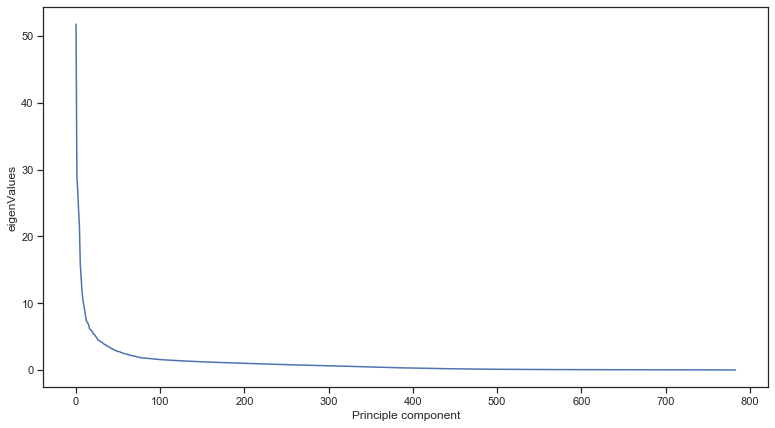

In [31]:
#scree plot for eigen values
plt.figure(figsize=(13,7))
plt.plot(sorted_eig_vals)
plt.xlabel("Principle component")
plt.ylabel("eigenValues")
plt.show()

### ANALYSIS

The above scree plot gives us the information about significant eigen values that needs to be retained for the implementation of PCA.The eigen values are sorted in descending order along with the eigen vector to plot the graph.So,from the above plot we are able to conclude that the top 40-50 eigen values will be a good fit.After finding the good fit of eigen values that needs to be retained we can project out original data to the new subspace.

+ **(2)** scatter plot of the projected data with the top 20 eigenvalues

In [32]:
Y_fea.shape

(2066,)

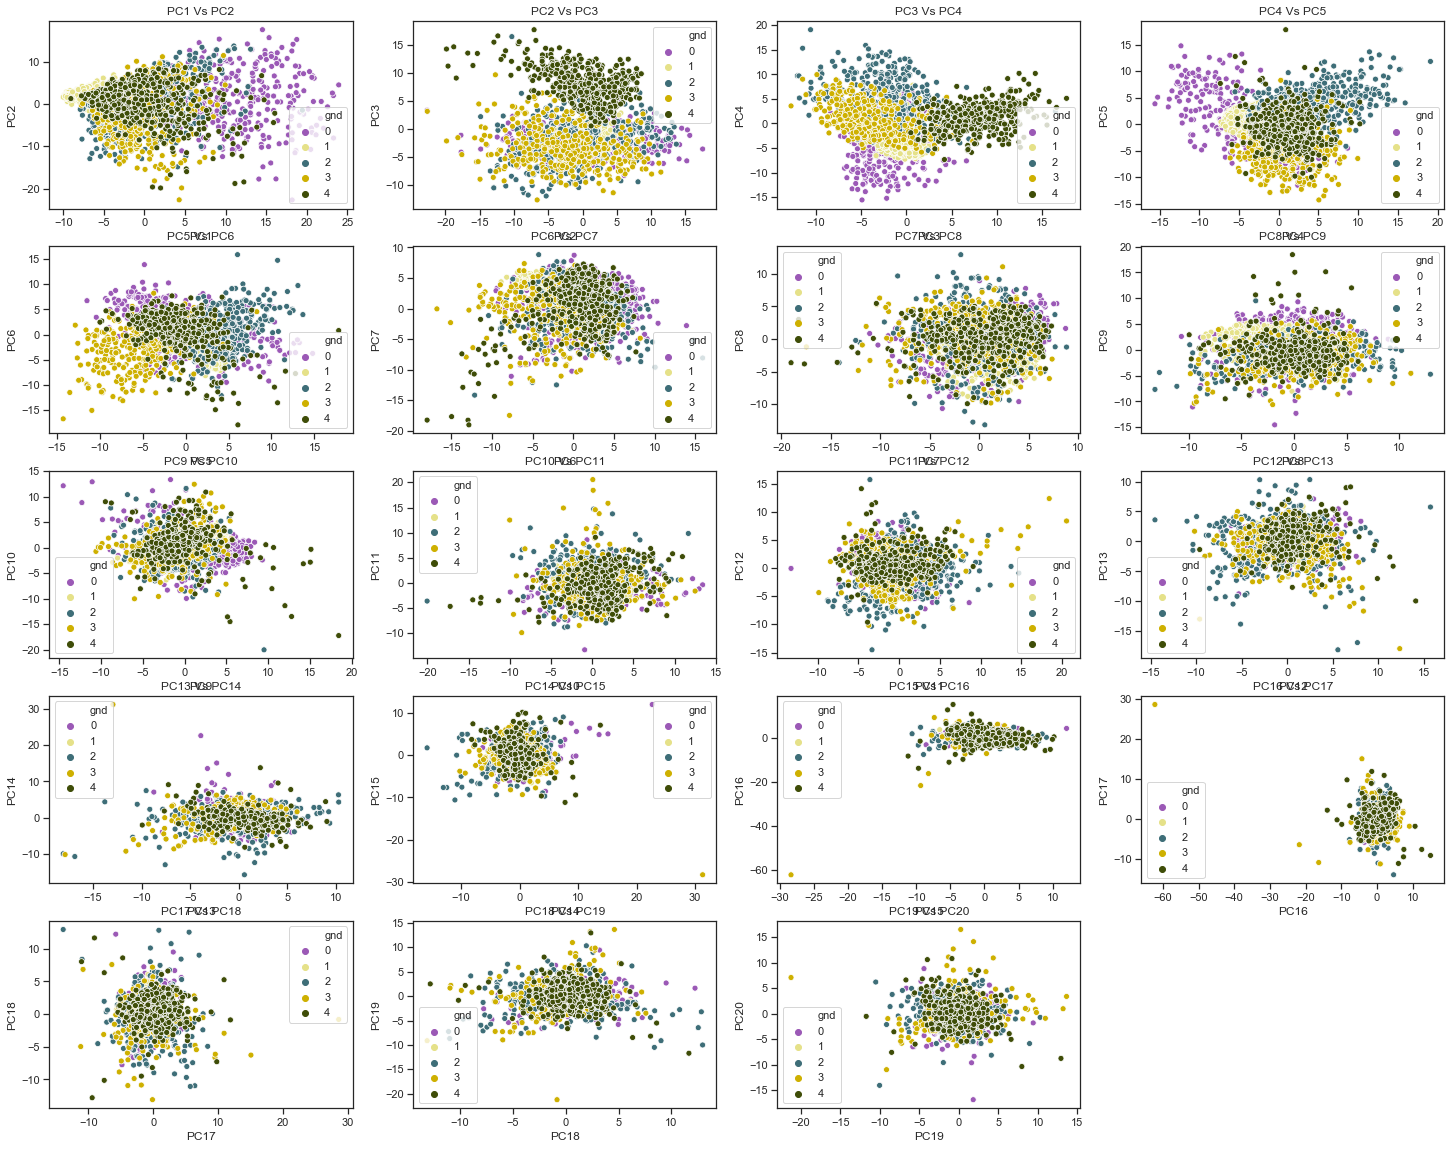

In [34]:
#considering the top 20 eigen values
matrix_w=sorted_eig_vecs[:,0:20]
matrix_w

#Projected data to the new subspace
projected = x_norm.dot(matrix_w)
projected
figure = plt.figure(figsize=(25,20))
pal={0:"#9b59b6",1:"#e5e189",2:"#3e6e78",3:"#ceb000",4:"#3f4d08"}
for i in range(len(projected[:19])):
    plt.subplot(5,4,i+1)
    x_val=projected[:,i]
    y_val=projected[:,i+1]
    plt.title("PC"+str(i+1)+" Vs "+"PC"+str(i+2))
    plt.xlabel("PC"+str(i+1))
    plt.ylabel("PC"+str(i+2))
    sns.scatterplot(x_val,y_val,hue=Y_fea,palette=pal)
plt.show()


### ANALYSIS

1.The scatterplots of the top 20 eigenvalues is plotted in terms of (pca1 vs pca2,pca2 vs pca3.....pca19 vs pca20).The scree plot just helps you to just identify whether PCA works well on your data or not whereas scatterplot helps you find the top eigen value till which your classification will be significant.The scatterplot is able to better classify the gnd label until pca5 vs pca6.Later as the number of components increases the data points are grouped in a narrower subspace and the data points overlap and hence the classification of data becomes difficult.So,till pca-6 will be a optimal pick.

+ **(3)** two 2-dimensional representations of the data points based on the first vs second principal components and 5th vs 6th

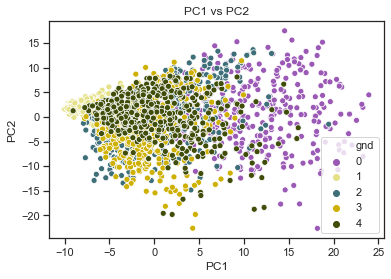

In [35]:
#PCA1 VS PCA2
pal={0:"#9b59b6",1:"#e5e189",2:"#3e6e78",3:"#ceb000",4:"#3f4d08"}
x_val=projected[:,0]
y_val=projected[:,1]
plt.title("PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
sns.scatterplot(x_val,y_val,hue=Y_fea,palette=pal)
plt.show()

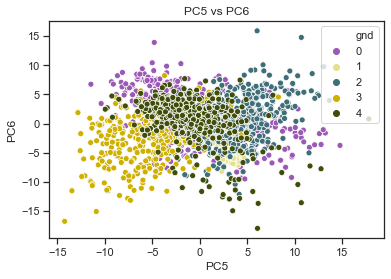

In [36]:
#PCA5 VS PCA6
pal={0:"#9b59b6",1:"#e5e189",2:"#3e6e78",3:"#ceb000",4:"#3f4d08"}
x_val=projected[:,4]
y_val=projected[:,5]
plt.title("PC5 vs PC6")
plt.xlabel("PC5")
plt.ylabel("PC6")
sns.scatterplot(x_val,y_val,hue=Y_fea,palette=pal)
plt.show()

### Analysis

1.The spread or variance of the datapoi(nts when PCA1 is projected against PCA2(-20 to 15) is better when compared to PCA5 vs PCA6 (-15 to 15)hence better the classification.The reason behind this is because we have sorted the eigen values and vectors in the descending order hence PCA1 will have the highly ranked eigen value.

2.We can also observe that the classes 0,1 and 4 are well classified in PC1, but in other Projected components it overlaps,hence the data points are not distinguished properly.

+ **(4)** PCA & DUAL PCA WITH SINGULAR VALUE DECOMPOSITION

In [37]:
x_norm = x_norm.transpose()
x_norm.shape


(784, 2066)

In [38]:
%%time
#pca implementation
xxt = np.dot(x_norm, x_norm.transpose())
eig_value_xxt, eig_vector_xxt = np.linalg.eigh(xxt)
index1 = np.argsort(np.abs(eig_value_xxt))[::-1]   
eig_value_xxt = eig_value_xxt[index1]
eig_vector_xxt = eig_vector_xxt[:,index1]
u = eig_vector_xxt
projected_pca = np.dot(u[:,:20].T,x_norm)
projected_pca

CPU times: user 307 ms, sys: 37 ms, total: 344 ms
Wall time: 94.5 ms


array([[ 9.97069222, 11.41599978,  3.69011918, ..., -0.34942153,
        -3.11526327, -5.64409375],
       [ 6.18172201,  6.94158705,  4.69309729, ...,  0.93368106,
         2.09047425, -0.24616663],
       [-4.99286326, -5.06302886, -2.9086564 , ...,  8.10744188,
         6.27251911,  4.14018317],
       ...,
       [-0.26257488,  0.96317397,  2.65907012, ..., -1.28086781,
        -1.30774666,  2.8474039 ],
       [ 1.42584762,  1.11655238, -0.66109634, ...,  1.19700404,
        -0.11716451, -1.14882287],
       [-1.16252257,  0.06708945, -5.12371489, ...,  1.08146006,
         1.59384718, -3.39490069]])

DUAL PCA using SVD

In [39]:
%%time
#dual pca implementation
xtx = np.dot(x_norm.transpose(), x_norm)
eig_value_xtx, eig_vector_xtx = np.linalg.eigh(xtx)
index2 = np.argsort(np.abs(eig_value_xtx))[::-1]   
eig_value_xtx = eig_value_xtx[index2]
eig_vector_xtx = eig_vector_xtx[:,index2]
v = eig_vector_xtx
no_of_rows=len(eig_value_xtx)
no_of_cols=len(x_norm.transpose())
sigma=np.zeros((no_of_rows,no_of_cols))
for i in range(no_of_rows):
               sigma[i][i]=np.sqrt(eig_value_xtx[i])
projected_dual= np.dot(sigma[:20,:], v.T)
projected_dual

CPU times: user 3.02 s, sys: 236 ms, total: 3.25 s
Wall time: 845 ms


array([[ 9.97069222, 11.41599978,  3.69011918, ..., -0.34942153,
        -3.11526327, -5.64409375],
       [-6.18172201, -6.94158705, -4.69309729, ..., -0.93368106,
        -2.09047425,  0.24616663],
       [ 4.99286326,  5.06302886,  2.9086564 , ..., -8.10744188,
        -6.27251911, -4.14018317],
       ...,
       [ 0.26257488, -0.96317397, -2.65907012, ...,  1.28086781,
         1.30774666, -2.8474039 ],
       [-1.42584762, -1.11655238,  0.66109634, ..., -1.19700404,
         0.11716451,  1.14882287],
       [ 1.16252257, -0.06708945,  5.12371489, ..., -1.08146006,
        -1.59384718,  3.39490069]])

### ANALYSIS PCA AND DUAL PCA
1. For PCA - CPU times: user 332 ms, sys: 46.2 ms, total: 378 ms
Wall time: 99.4 ms

2. For Dual PCA - CPU times: user 2.98 s, sys: 210 ms, total: 3.19 s
Wall time: 810 ms

- For computation of PCA,we compute u(for which we will be computing eigen value and vector of x.x_transpose) this will be projected on to the original data to find the projected data.Whereas,When you consider dual-pca, we have to compute v(for which we will be computing eigen value and vector of x_transpose.x).In addition to this we will be computing sigma then we find sigma.v_transpose to find dual pca.

- In general when the number of features are more than the number of samples provided then dual PCA works better else PCA is better.In the data that we are considering the number of samples is greater than the number of features and hence PCA performs better.In both the methods implemented the projected data is the same.

####  2.2.2 Prove that PCA is the best linear method for reconstruction(with orthonormal bases)

![title](1.jpeg)

![title](2.jpeg)

## Fisher Discriminant Analysis (FDA)
### Practical Questions
#### 2.3.1

In [40]:
%%time
#implementing LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x_norm.T, Y_fea)
lda_trans = lda.transform(x_norm.T)
# y_DataB1 = y_DataB.iloc[:,-1]

CPU times: user 1.09 s, sys: 125 ms, total: 1.21 s
Wall time: 434 ms


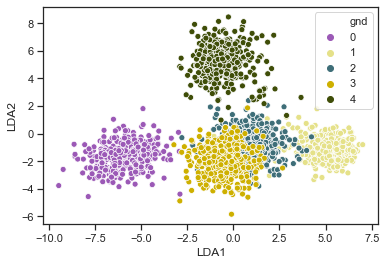

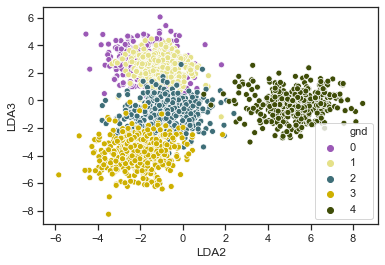

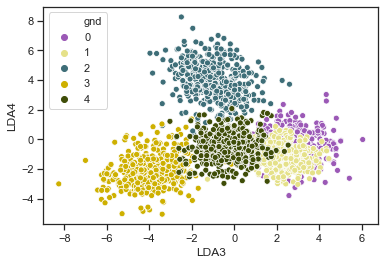

In [41]:
for i in range(3):
    ax=sns.scatterplot(lda_trans[:, i], lda_trans[:, i+1], hue=Y_fea,palette=pal)
    x_label = 'LDA' + str(i+1)
    y_label = 'LDA' + str(i+2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

### Analysis- 
Pairplots for LDA is obtained.
From the plots obtained we are able to observe that 
- gnd with value 4 is best classified in all the three plots (ie) LDA1 vs LDA2,LDA2 vs LDA3,LDA3 vs LDA4
- gnd with value 0 and 1 is best classified in LDA1 vs LDA2 whereas in the later plots it overlaps with gnd label 1 and 0 respectively for each other. 
- gnd with value 2 is best classified in LDA3 vs LDA4 but overlaps with other label value in the remaining plots.
- gnd with value 3 is best classified in LDA2 vs LDA3 and LDA3 vs LDA4.

### 2.3.1.2
#### Analysis

LDA vs PCA

1. Classification (LDA performs better)
 -When you compare the classification rate of PCA and LDA from the scatterplots obtained,we observe that LDA performs better than PCA in classifying the data points.

2. Time Based Analysis (Overall time is computed for each implementation)

1. For PCA - 
CPU times: user 332 ms, sys: 46.2 ms, total: 378 ms
Wall time: 99.4 ms
2. For Dual PCA - 
CPU times: user 2.98 s, sys: 210 ms, total: 3.19 s
Wall time: 810 ms
3. LDA -
CPU times: user 1.04 s, sys: 124 ms, total: 1.17 s
Wall time: 438 ms
 
    
From the above obtained data,we are able to observe that PCA performs faster than LDA & Dual PCA.
But when you compare the performance in terms of speed between Dual PCA & LDA,LDA is the best.
    



### Theoretical Question

![title](3.jpeg)

![title](4.jpeg)

# Nonlinear Dimensionality Reduction
## Plot
+ **(1) kernel PCA**

In [42]:
#loading DataB into a dataframe
fea_n = pd.read_csv("DataB.csv")#2066*786
#fea
fea_n.drop(fea_n.columns[[0]], axis = 1, inplace = True)
#decidinf the x and prediction variable
X_fea= fea_n.iloc[:,0:-1]
Y_fea= fea_n.iloc[:,-1]
X_fea

fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0         4      4      3      0      0      4      2      1      4       1   
1         5      1      4      3      1      3      5      1      4       4   
2         1      3      0      3      1      1      0      1      0       2   
3         5      3      2      3      5      2      2      0      4       5   
4         3      5      3      3      0      4      1      1      4       3   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
2061      4      0      3      0      4      0      4      3      1       2   
2062      2      2      3      4      2      1      2      3      3       4   
2063      2      3      2      3      1      2      5      5      5       0   
2064      5      2      4      3      1      0      3      2      2       1   
2065      3      3      1      3      2      5      4      2      2       4   

      ...  fea.775  fea.776  fea.777  fea.778  fea.779  fea.780  fea.781  \
0     ...        1        1        3        0        4        2        1   
1     ...        3        1        1        3        3        1        3   
2     ...        4        3        0        2        4        2        2   
3     ...        4        5        4        5        1        4        4   
4     ...        1        1        3        3        3        1        2   
...   ...      ...      ...      ...      ...      ...      ...      ...   
2061  ...        3        0        1        4        5        4        2   
2062  ...        1        4        0        1        3        4        0   
2063  ...        3        5        1        1        2        5        2   
2064  ...        2        3        2        3        1        4        2   
2065  ...        3        2        3        1        4        4        5   

      fea.782  fea.783  fea.784  
0           1        4        5  
1           3        5        4  
2           1        2        4  
3           2        4        4  
4           4        1        1  
...       ...      ...      ...  
2061        2        2        2  
2062        2        3        2  
2063        1        1        3  
2064        4        3        4  
2065        1        3        1  

[2066 rows x 784 columns]

In [43]:
%%time
#using kernel pca
k_pca = KernelPCA(n_components=2, kernel='rbf',random_state=42)
X_kpca = k_pca.fit_transform(X_fea)
X_kpca.shape

CPU times: user 515 ms, sys: 107 ms, total: 622 ms
Wall time: 171 ms


(2066, 2)

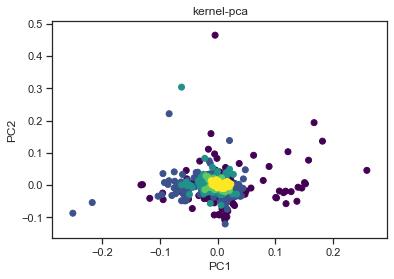

In [44]:
# scatterplot for kernelpca
x_val=X_kpca[:,0]
y_val=X_kpca[:,1]
plt.scatter(x_val,y_val,c=Y_fea,cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("kernel-pca")
plt.show()

+ **(2) Isomap**

In [45]:
%%time
#isomap 
embedding = Isomap(n_components=2)
X_isomap = embedding.fit_transform(X_fea)

CPU times: user 7.96 s, sys: 108 ms, total: 8.07 s
Wall time: 7.91 s


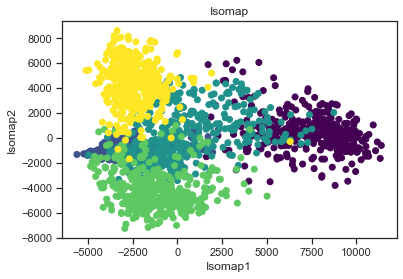

In [46]:
#scatterplot for isomap
x_val=X_isomap[:,0]
y_val=X_isomap[:,1]
plt.scatter(x_val,y_val,c=Y_fea,cmap='viridis')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.title("Isomap")
plt.show()

+ **(3) Locally Linear Embedding (LLE)**

In [47]:
%%time
#lle
ll_embedding = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = ll_embedding.fit_transform(X_fea)

CPU times: user 6.72 s, sys: 95.3 ms, total: 6.82 s
Wall time: 6.67 s


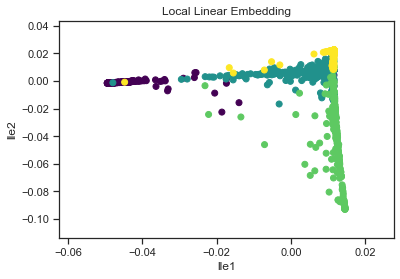

In [48]:
#scatterplot for lle
x_val=X_lle[:,0]
y_val=X_lle[:,1]
plt.scatter(x_val,y_val,c=Y_fea,cmap='viridis')
plt.xlabel('lle1')
plt.ylabel('lle2')
plt.title("Local Linear Embedding")
plt.show()

+ **(4) Laplacian Eigenmap**

In [ ]:
%%time
#laplacian eigenmap
embedding = SpectralEmbedding(n_components=2,random_state=42)
X_spectralmapping = embedding.fit_transform(X_fea)

In [ ]:
#scatterplot for laplacian eigenmap
x_val=X_spectralmapping[:,0]
y_val=X_spectralmapping[:,1]
plt.scatter(x_val,y_val,c=Y_fea,cmap='viridis')
plt.xlabel('Spectralmapping1')
plt.ylabel('Spectralmapping2')
plt.title("Spectralmapping")
plt.show()


+ **(5) t-SNE**

In [ ]:
%%time
#t-SNE
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2).fit_transform(X_fea)

In [ ]:
#scatterplot for t-sne
x_val=X_tsne[:,0]
y_val=X_tsne[:,1]
plt.scatter(x_val,y_val,c=Y_fea,cmap='viridis')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.title("t-sne")
plt.show()


### ANALYSIS
### Performance Analysis  (T-SNE IS THE BEST IN TERMS OF CLASSIFICATION)

1. Time Analysis 
    - KernelPCA -
    -CPU times: user 665 ms, sys: 115 ms, total: 779 ms
     Wall time: 193 ms

    - ISOMAP -
    -CPU times: user 7.28 s, sys: 58.4 ms, total: 7.34 s
     Wall time: 7.08 s
     
    - LLE - 
    -CPU times: user 6.62 s, sys: 94.8 ms, total: 6.72 s
     Wall time: 6.53 s
     
    - Laplacian - 
    -CPU times: user 8.64 s, sys: 425 ms, total: 9.07 s
     Wall time: 6.72 s
    
    - T-SNE - 
    CPU times: user 47.9 s, sys: 295 ms, total: 48.2 s
    Wall time: 11.1 s
     
In terms of time taken,Kernel PCA performs the best,whereas t-sne takes the maximum time.

2. Classification based on pair plots obtained

In terms of visualization,T-SNE classifies the data to the best and we are able to see apt boundary regions between the different class.T-sne is followed by LLE then Isomap.In kernel PCA there is a lot of overlapping and laplacian eigen map provides bad classification as data is crowded in a narrower projection.

3. Variance
The datapoints in isomap has a higher variance followed by t-sne where as the variance of data points in spectral mapping is very low and hence the data points are crowded in a smaller space thereby the visualization of different data points are not seen properly(They overlap).
    


